## Shell Contact Example

In [1]:
# !pip install debugpy

In [2]:
import numpy as np

import dismech


geom = dismech.GeomParams(rod_r0=0.005,
                          shell_h=0.001)

material = dismech.Material(density=1200,
                            youngs_rod=0,
                            youngs_shell=2e4,
                            poisson_rod=0,
                            poisson_shell=0.5)

shell_contact_sim = dismech.SimParams(static_sim=False,
                                  two_d_sim=False,   # no twisting
                                  use_mid_edge=False,
                                  use_line_search=True,
                                  show_floor=False,
                                  log_data=True,
                                  log_step=1,
                                  dt=1e-2,
                                  max_iter=120,
                                  total_time=0.7,
                                  plot_step=1,
                                  tol=1e-4,
                                  ftol=1e-4,
                                  dtol=1e-2)

env = dismech.Environment()
env.add_force('gravity', g=np.array([0.0, 0.0, -9.81]))
# env.add_force('floorContact', ground_z=-1e-3, stiffness=20, delta=1e-4, h=1e-3)
env.add_force('selfContact', delta=1e-4, h=1e-3, kc=0.1)
env.add_force('damping', eta = 0.01)
#env.set_static()   

# geo = dismech.Geometry.from_txt('random_mesh_20.txt')

geo = dismech.Geometry.from_txt('input_shell_random_more_curved.txt')
# geo = dismech.Geometry.from_txt('input_shell_more_curved_scaled.txt')
# geo = dismech.Geometry.from_txt('input_oneTriangle.txt')
# geo = dismech.Geometry.from_txt('input_twoTriangleContact_p2t.txt')

robot = dismech.SoftRobot(geom, material, geo, shell_contact_sim, env)

# fixed_points = np.array(np.where(
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] <= 0.01) &
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] == 0.0)
# )[0])
fixed_points = np.array(np.where(
    (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001) # (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001)
)[0])

# fixed_points = np.array(np.where(
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] <= 0.455) & 
#     (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 0] >= 0.445) # (robot.state.q[:robot.end_node_dof_index].reshape(-1, 3)[:, 2] < 0.001)
# )[0])


robot = robot.fix_nodes(fixed_points)

# u = robot.state.u
# u[11] = -0.5
# u[14] = -0.5
# u[17] = -0.5

### Time Stepping

As we are performing a static simulation, we must change gravity for each time step.

In [3]:
stepper = dismech.ImplicitEulerTimeStepper(robot)

robots = stepper.simulate()

qs = np.stack([robot.state.q for robot in robots])

delta: 0.1
h: 1.0
K1: 150.0
scale:  1000.0
kc:  0.1
upper limit for quadratic: 1.9
upper limit for smooth: 2.1
264.64671609639305
0.011384499104254044
current_time:  0.01
246.30969269175066
0.009578557497203925
current_time:  0.02
235.493572260741
0.009083105973588438
current_time:  0.03
225.33212904584977
0.008604768218175957
current_time:  0.04
0.0019426304429377645
0.00011635211860779535
current_time:  0.05
0.0018024858633008862
0.00010435565451036791
current_time:  0.06
0.0017868550463365546
9.585677871724882e-05
current_time:  0.07
0.0017756506100105346
8.938513633762248e-05
current_time:  0.08
0.001766223993057869
8.401751287420414e-05
current_time:  0.09
0.0017576983401853625
7.938713994463617e-05
current_time:  0.1
0.0017497125468846533
7.528331769955742e-05
current_time:  0.11
0.0017420564499662009
7.156729442444312e-05
current_time:  0.12
0.0017345882890577422
6.814608548007988e-05
current_time:  0.13
0.001727210451254047
6.4956943899261e-05
current_time:  0.14
0.001719857355

In [4]:
t = np.arange(robot.sim_params.total_time, step=robot.sim_params.dt)
options = dismech.AnimationOptions(title='Shell contact p2p', plot_step=1)

fig = dismech.get_interactive_animation_plotly(robot, t, qs, options)
fig.show()

70


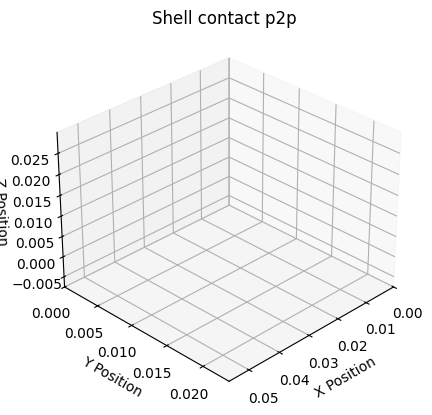

In [5]:
ani = dismech.get_animation(robot, t, qs, options)
ani.save('5e-5.gif')